In [85]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Generate data

In [86]:
SAMPLES = 150_000

In [87]:
# generate features
X = np.random.uniform(0, 100, SAMPLES) + np.sin(SAMPLES)

# generate targtes
y = np.array([1 if X[i] > 50 else 0 for i in range(len(X))])

# Train-Test Split (80/20)

In [88]:
def train_test_split(X, y):
    X_train, X_test = X[:round(SAMPLES*0.8)], X[round(SAMPLES*0.8):]
    y_train, y_test = y[:round(SAMPLES*0.8)], y[round(SAMPLES*0.8):]

    return X_train, X_test, y_train, y_test

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scale The Data

In [90]:
class StandartScaler():
    def __init__(self, X_train, X_test):
        self.X_train = X_train
        self.X_test = X_test

    def fit(self, X_train):
        '''The Scaler firt training data'''
        self.mean = np.mean(self.X_train)
        self.std = np.std(self.X_train)

    def transform(self, data, train=None):
        if train:
            self.data = (self.X_train - self.mean) / self.std
            return self.data
        else:
            self.data = (self.X_test - self.mean) / self.std
            return self.data

In [91]:
# create new instance
scaler = StandartScaler(X_train, X_test)

# fit scaler only on training data
scaler.fit(X_train)

# perform scaling on train data
X_train_scaled = scaler.transform(X_train, train=True)
print(f'Original Data: {X_train[:3]}')
print(f'Scaled Data: {X_train_scaled[:3]}')

# and on test
X_test_scaled = scaler.transform(X_test, train=False)

Original Data: [ 6.90778401 94.83653927 62.26492147]
Scaled Data: [-1.5268492   1.51764878  0.38986954]


 # Define Training loop and all main functions

In [92]:
def sigmoid(z):
    '''Implement Signmoid Function'''
    return np.where(z >= 0, 1/(1 + np.exp(-z)), np.exp(z)/(1 + np.exp(z)))

def loss_func(N, y, p):
    '''Implement Loss Function'''
    return -(1/len(N)) * np.sum(y*np.log(p) + (1 - y)*np.log(1 - p))

In [93]:
def train_logistic_regression(X, y, lr=0.1, epochs=200):
    '''Training Loop'''
    w = 0.0 # initialize weights
    b = 0.0 # initialize bias

    # lists for statistic and another staff accumulation
    probabilities = []
    loss_list = []
    train_weights = []
    train_bias = []

    # main loop
    for epoch in tqdm(range(epochs), desc='Training Logistic Regression'):
        # get probabilities from model
        raw_probs = sigmoid(X*w + b)

        # calculate loss
        loss = loss_func(X, y, raw_probs)
        loss_list.append(loss)

        # calculate partial derivative of loss function
        dw = np.mean((raw_probs - y) * X)
        db = np.mean(raw_probs - y)
        
        # gradient descent
        w = w - lr * dw
        b = b - lr * db
        
        #final probabilities
        probs = sigmoid(X*w + b)
        model_answer = [1 if i > 0.5 else 0 for i in probs]
        running_correct_pred = np.equal(model_answer, y)
        running_acc = np.sum(running_correct_pred) / len(y)
        if epoch % 50 == 0:
            print(f'Current Accuracy: {running_acc}')

        # saving model weights
        train_weights.append(w)
        train_bias.append(b)

    # calculate accuracy
    prob = sigmoid(X*w + b)
    final_prob = [1 if i > 0.5 else 0 for i in prob]
    correct_pred = np.equal(final_prob, y)
    acc = np.sum(correct_pred) / len(y)

    return probabilities, loss_list, acc, np.array(train_weights), np.array(train_bias)

In [94]:
train_result, train_loss, train_accuracy, weight, bias = train_logistic_regression(X=X_train_scaled, y=y_train)

Training Logistic Regression:   4%|▍         | 9/200 [00:00<00:02, 83.95it/s]

Current Accuracy: 0.9977083333333333


Training Logistic Regression:  34%|███▍      | 69/200 [00:00<00:01, 93.78it/s]

Current Accuracy: 0.997975


Training Logistic Regression:  55%|█████▍    | 109/200 [00:01<00:01, 90.32it/s]

Current Accuracy: 0.9984083333333333


Training Logistic Regression:  82%|████████▏ | 164/200 [00:01<00:00, 87.81it/s]

Current Accuracy: 0.9987666666666667


Training Logistic Regression: 100%|██████████| 200/200 [00:02<00:00, 88.93it/s]


Train Accuracy: 0.9989333333333333


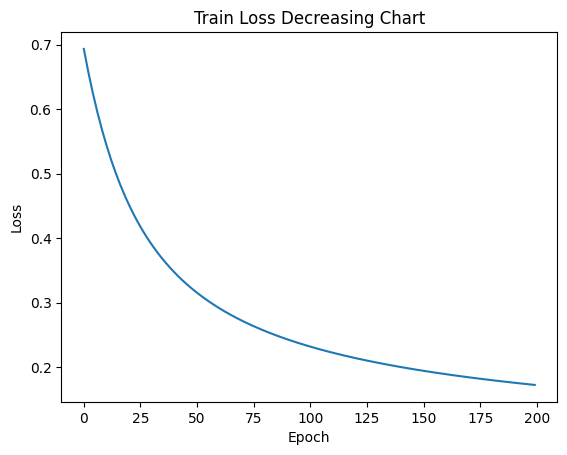

In [95]:
# plt.figure(figsize=(10, 9))
plt.plot(train_loss)
# plt.plot(train_accuracy)
plt.title('Train Loss Decreasing Chart')
plt.xlabel('Epoch')
plt.ylabel('Loss')
print(f'Train Accuracy: {train_accuracy}')

# Validate Model

In [96]:
def validate_logistic_regression(X, y):
    
    preds = sigmoid(X*weight[::-1][0] + bias[::-1][0])
    loss = loss_func(X, y, preds)
    final_model_answer = [1 if i > 0.5 else 0 for i in preds]
    correct_pred = np.equal(final_model_answer, y)
    acc = np.sum(correct_pred) / len(preds)
    
    return acc, loss

In [97]:
test_acc, test_loss = validate_logistic_regression(X_test_scaled, y_test)

print(f'Test Accuracy: {test_acc}\nTest Loss: {test_loss:.3f}')

Test Accuracy: 0.9989666666666667
Test Loss: 0.171
